## Support Vector Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Create Synthetic Data Points

In [2]:
from sklearn.datasets import make_classification

In [358]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_classes=2,
                           n_clusters_per_class=1,
                           n_redundant=0,
                          random_state=7)#7

In [359]:
X

array([[ 0.55675712, -0.90890878],
       [ 0.03286753, -0.66195807],
       [-0.81578351,  1.1191489 ],
       ...,
       [-0.91907058,  1.82443752],
       [ 1.11338561, -0.98243012],
       [-1.19474623,  0.80284502]], shape=(1000, 2))

In [360]:
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [361]:
pd.DataFrame(X)

,0,1
0,0.556757,-0.908909
1,0.032868,-0.661958
2,-0.815784,1.119149
3,1.349261,-1.072139
4,-1.405695,0.274439
...,...,...
995,0.673070,-0.899829
996,0.528484,-0.891292
997,-0.919071,1.824438
998,1.113386,-0.982430


In [362]:
pd.DataFrame(X)[0] # get first column

0      0.556757
1      0.032868
2     -0.815784
3      1.349261
4     -1.405695
         ...   
995    0.673070
996    0.528484
997   -0.919071
998    1.113386
999   -1.194746
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

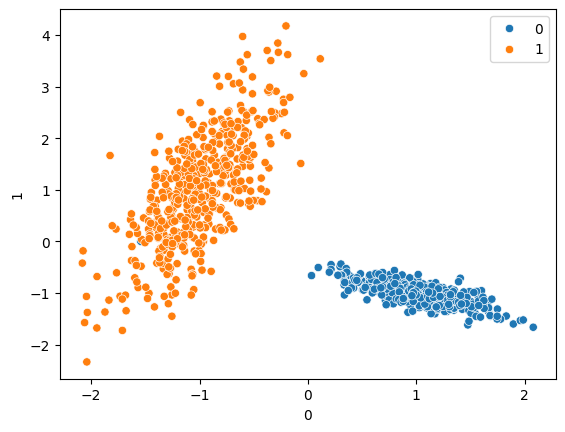

In [363]:
# Between 2 columns
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [365]:
from sklearn.svm import SVC

In [366]:
svm = SVC(kernel='linear') # when data points clearly separable use linear kernel

In [367]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [368]:
## prediction
y_pred = svm.predict(X_test)

In [369]:
from sklearn.metrics import classification_report, confusion_matrix

In [370]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       126

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[124   0]
 [  0 126]]


### Let's Use non linear data points and rbf kernel

In [379]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_classes=2,
                           n_clusters_per_class=2,
                           n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

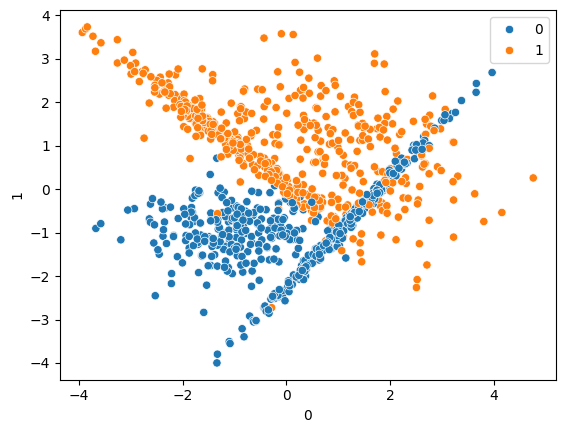

In [380]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [382]:
rbf = SVC(kernel='rbf')

In [383]:
svm.fit(X_train, y_train)
rbf.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_pred_rbf = rbf.predict(X_test)

In [385]:
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

print("\n")
print("*" * 50)

print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       121
           1       0.86      0.81      0.83       129

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[104  17]
 [ 25 104]]


**************************************************
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       121
           1       0.95      0.81      0.88       129

    accuracy                           0.88       250
   macro avg       0.89      0.89      0.88       250
weighted avg       0.89      0.88      0.88       250

[[116   5]
 [ 24 105]]


### Trying with Polynomial kernel

In [388]:
polynomial = SVC(kernel='poly')

polynomial.fit(X_train, y_train)

y_pred_polynomial = polynomial.predict(X_test)

In [389]:
print(classification_report(y_test, y_pred_polynomial))
print(confusion_matrix(y_test, y_pred_polynomial))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       121
           1       0.85      0.67      0.75       129

    accuracy                           0.77       250
   macro avg       0.78      0.77      0.77       250
weighted avg       0.78      0.77      0.77       250

[[106  15]
 [ 43  86]]


### Trying with Sigmoid

In [390]:
sigmoid = SVC(kernel='sigmoid')

sigmoid.fit(X_train, y_train)

y_pred_sigmoid = sigmoid.predict(X_test)

print(classification_report(y_test, y_pred_sigmoid))
print(confusion_matrix(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       121
           1       0.82      0.86      0.84       129

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 97  24]
 [ 18 111]]


### Hyperparameter Tuning

In [397]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf', 'linear', 'polynomial']}

In [398]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=3, refit=True) # refit for every cross validation

In [399]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.820 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

C:\Users\gurunaml\OneDrive - Firstsource Solutions Ltd\Desktop\ML\ML\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gurunaml\OneDrive - Firstsource Solutions Ltd\Desktop\ML\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gurunaml\OneDrive - Firstsource Solutions Ltd\Desktop\ML\ML\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\gurunaml\OneDrive - Firstsource So

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'polynomial']},
             verbose=3)

In [400]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [401]:
# predictions
y_pred4 = grid.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       121
           1       0.97      0.92      0.94       129

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250

[[117   4]
 [ 10 119]]
